# Import Required Libraries

Import libraries such as pandas, numpy, matplotlib, and PIL for data handling and visualization.

In [3]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Load CSV Data

Read the CSV file using pandas to extract image filenames, coordinates (x, y, z), and rotation values (Rx, Ry, Rz).

In [10]:
# Load CSV Data
csv_path = "/Users/angelinacu/Desktop/Study/Viettel /ThiSinh/train/Public train.csv"
df = pd.read_csv(csv_path)

# Display first few rows to verify
df.head()

,image_filename,x,y,z,Rx,Ry,Rz
0,image_0001.png,-0.056,0.042,1.060,0.0000,0.0000,1.0000
1,image_0002.png,-0.086,-0.141,1.046,-0.2642,-0.1098,0.9582
2,image_0003.png,-0.084,-0.201,0.960,-0.5468,0.0116,0.8372
3,image_0004.png,0.133,-0.231,0.998,0.0000,0.0000,1.0000
4,image_0005.png,-0.033,0.009,1.054,-0.2413,0.0169,0.9703


# Visualize Position and Orientation on Image

Overlay the extracted coordinates and orientation (e.g., as arrows or text) directly on the displayed image using matplotlib's annotation and quiver functions.

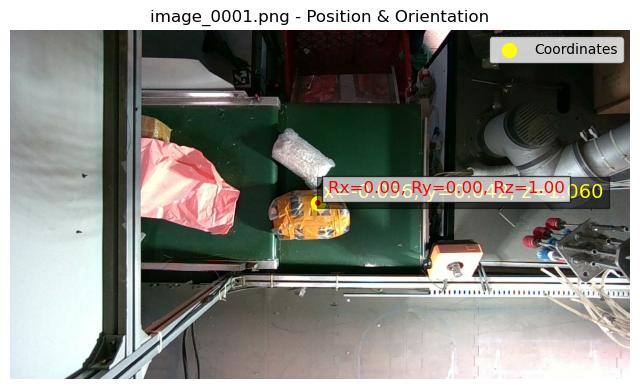

In [13]:
# Visualize Position and Orientation on Image

# Get the row for image_0001.png
image_name = "image_0001.png"
row = df[df['image_filename'] == image_name].iloc[0]

# Extract coordinates and rotation
x, y, z = row['x'], row['y'], row['z']
Rx, Ry, Rz = row['Rx'], row['Ry'], row['Rz']

# Display image
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title(f"{image_name} - Position & Orientation")

# Overlay coordinates as a point (circle) on the image
# For demo, map (x, y) to image pixel coordinates (you may need to adjust scaling)
img_width, img_height = img.size
# Example: scale x, y to image center for visualization
center_x = img_width // 2 + int(x * 100)
center_y = img_height // 2 - int(y * 100)
plt.scatter(center_x, center_y, color='yellow', s=100, label='Coordinates')

# Overlay coordinates as text
plt.text(center_x + 10, center_y - 10, f"x={x:.3f}, y={y:.3f}, z={z:.3f}", color='yellow', fontsize=14, bbox=dict(facecolor='black', alpha=0.5))

# Overlay orientation as arrow (quiver)
arrow_length = 40
rot_vec = np.array([Rx, Ry])
if np.linalg.norm(rot_vec) > 0:
    rot_vec = rot_vec / np.linalg.norm(rot_vec)
else:
    rot_vec = np.array([0, 0])
plt.quiver(center_x, center_y, rot_vec[0]*arrow_length, -rot_vec[1]*arrow_length, angles='xy', scale_units='xy', scale=1, color='red', width=0.01)
plt.text(center_x + 20, center_y - 20, f"Rx={Rx:.2f}, Ry={Ry:.2f}, Rz={Rz:.2f}", color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.legend()
plt.show()

FEngine (64 bits) created at 0x33c100000 (threading is enabled)
FEngine resolved backend: OpenGL


2025-10-15 10:21:49.488 python[93188:6055535] +[IMKClient subclass]: chose IMKClient_Legacy
2025-10-15 10:21:49.488 python[93188:6055535] +[IMKInputSession subclass]: chose IMKInputSession_Legacy
[error] GLFW error: Cocoa: Failed to find service port for display
2025-10-15 10:21:53.486 python[93188:6055535] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


: 

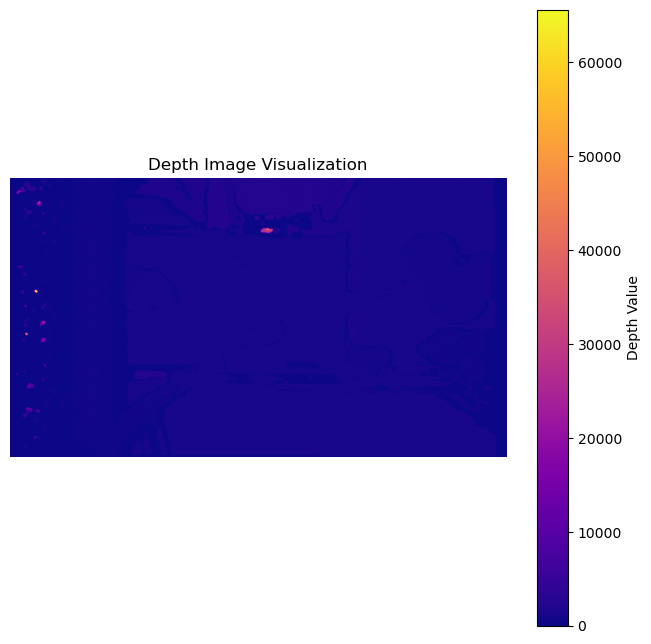

In [20]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh depth
depth_img_path = "/Users/angelinacu/Desktop/Study/Viettel /ThiSinh/train/depth/0001.png"
depth_img = cv2.imread(depth_img_path, cv2.IMREAD_UNCHANGED)

# Hiển thị ảnh depth với colormap
plt.figure(figsize=(8, 8))
plt.imshow(depth_img, cmap='plasma')
plt.colorbar(label='Depth Value')
plt.title("Depth Image Visualization")
plt.axis('off')
plt.show()

In [7]:
import cv2
import numpy as np

img = cv2.imread("/Users/angelinacu/Desktop/Study/Viettel /ThiSinh/train/depth/0000.png", cv2.IMREAD_UNCHANGED)
print(img.shape)  
print(img.dtype) 
print(np.min(img), np.max(img))  
print(np.unique(img))

print(img)
with open("img.txt", "w") as f:
    f.write(str(img))

(720, 1280)
uint16
0 65535
[    0   493   494 ... 61821 63815 65535]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
